## Explore the relationship of features

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [9]:
#data=pd.read_csv('../data/Consumer_Complaints.csv',nrows = 2000)
data=pd.read_csv('../data/Consumer_Complaints.csv')

In [10]:
data['Date received'] = pd.to_datetime(data['Date received'],infer_datetime_format=True)
data['Date sent to company'] = pd.to_datetime(data['Date sent to company'],infer_datetime_format=True)

In [11]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-08-09,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,08872,NaN,Consent not provided,Web,2015-08-09,Closed with non-monetary relief,Yes,No,1509954
1,2019-12-23,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,NaN,NaN,AES/PHEAA,MA,019XX,NaN,NaN,Web,2019-12-23,Closed with explanation,Yes,NaN,3475943
2,2019-01-29,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",NY,10801,NaN,Consent not provided,Web,2019-01-30,Closed with non-monetary relief,Yes,NaN,3136759
3,2015-08-19,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,Company chooses not to provide a public response,WELLS FARGO & COMPANY,CA,94526,NaN,Consent not provided,Web,2015-08-19,Closed with explanation,Yes,No,1527601
4,2016-03-04,Credit card,NaN,Billing disputes,NaN,I am dissatisfied with the current outcome of ...,NaN,DISCOVER BANK,NV,891XX,NaN,Consent provided,Web,2016-03-04,Closed with explanation,Yes,Yes,1816726


### Lets's find if any of the feature can be an index, potentially the 'Complaint ID'

In [12]:
data['Consumer disputed?'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [13]:
data.set_index('Complaint ID', inplace=True)

### 'Complaint ID' is a good choice for indexing the entries

In [14]:
data['Company public response'].unique().tolist()

['Company chooses not to provide a public response',
 nan,
 'Company has responded to the consumer and the CFPB and chooses not to provide a public response',
 'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
 'Company believes it acted appropriately as authorized by contract or law',
 'Company believes complaint is the result of an isolated error',
 'Company disputes the facts presented in the complaint',
 'Company believes the complaint is the result of a misunderstanding',
 "Company can't verify or dispute the facts in the complaint",
 'Company believes complaint represents an opportunity for improvement to better serve consumers',
 'Company believes complaint relates to a discontinued policy or procedure']

In [15]:
data['Company response to consumer'].unique().tolist()

['Closed with non-monetary relief',
 'Closed with explanation',
 'Closed without relief',
 'Closed with monetary relief',
 'Closed',
 'Untimely response',
 'In progress',
 'Closed with relief',
 nan]

In [16]:
data['Timely response?'].unique().tolist()

['Yes', 'No']

In [17]:
data['Submitted via'].unique().tolist()

['Web', 'Referral', 'Phone', 'Fax', 'Postal mail', 'Email']

In [18]:
data['Product'].unique().tolist()

['Credit reporting',
 'Student loan',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Mortgage',
 'Credit card',
 'Debt collection',
 'Bank account or service',
 'Credit card or prepaid card',
 'Vehicle loan or lease',
 'Money transfer, virtual currency, or money service',
 'Checking or savings account',
 'Money transfers',
 'Payday loan, title loan, or personal loan',
 'Prepaid card',
 'Consumer Loan',
 'Other financial service',
 'Payday loan',
 'Virtual currency']

### All the other features 'Product', 'Company Public Response', 'Company response to consumer' and 'Submitted via' are categorical. So we can label encode them wither by the label encoder or On-hot-Encoding for modeling purposes.

#### Additionally, some of the products were separated prior to 2017. After this year some services are joined although the products are the same. So we'll first find out those products and restructure or merge them so that all the product-sub product types are unique.

In [19]:
data['Sub-product'][data.Product=='Credit reporting'].unique().tolist()

[nan]

In [20]:
data['Sub-product'][data.Product=='Credit reporting, credit repair services, or other personal consumer reports'].unique().tolist()

['Credit reporting',
 'Other personal consumer report',
 'Credit repair services',
 'Conventional home mortgage']

In [21]:
data.loc[(data['Product'] == 'Credit reporting') & (data['Sub-product'].isnull()), 'Sub-product']='Credit reporting'
data.loc[(data['Product'] == 'Credit reporting') & (data['Sub-product'] == 'Credit reporting'), 'Product']='Credit reporting, credit repair services, or other personal consumer reports'

We can check if other products can also be merged..

In [22]:
data.loc[(data['Product'] == 'Payday loan') & (data['Sub-product'].isnull()), 'Sub-product']='Payday loan'
data.loc[(data['Product'] == 'Payday loan') & (data['Sub-product'] == 'Payday loan'), 'Product']='Payday loan, title loan, or personal loan'

In [23]:
data.loc[(data['Product'] == 'Credit card') & (data['Sub-product'].isnull()), 'Sub-product']='General-purpose credit card or charge card'

In [24]:
data[(data['Product'] == 'Credit card') & (pd.DatetimeIndex(data['Date received']).year>=2017)].shape

(7133, 17)

In [25]:
data[(data['Product'] == 'Prepaid card') & (pd.DatetimeIndex(data['Date received']).year<=2017)].shape

(3819, 17)

Seems like 'Credit reporting' was a separate product' before 2017 but it is merged with 'Credit reporting, credit repair services, or other personal consumer reports'. So we can as well club those before 2017 into the latter product.

In [26]:
set(data['Sub-product'][data.Product=='Credit card or prepaid card'].unique().tolist())-set(data['Sub-product'][data.Product=='Prepaid card'].unique().tolist())

{'General-purpose credit card or charge card',
 'General-purpose prepaid card',
 'Gift card',
 'Government benefit card',
 'Store credit card',
 'Student prepaid card'}

In [27]:
data['Sub-product'][data.Product=='Prepaid card'].unique().tolist()

['General purpose card',
 'Mobile wallet',
 'Payroll card',
 'Other special purpose card',
 'ID prepaid card',
 'Government benefit payment card',
 'Gift or merchant card',
 'Transit card',
 'Electronic Benefit Transfer / EBT card']

In [28]:
data.loc[(data['Product'] == 'Credit card') & (pd.DatetimeIndex(data['Date received']).year<=2017),'Product']='Credit card or prepaid card'

In [29]:
data.loc[(data['Product'] == 'Prepaid card') & (pd.DatetimeIndex(data['Date received']).year<=2017),'Product']='Credit card or prepaid card'

In [30]:
data.loc[(data['Product'] == 'Prepaid card') & (data['Sub-product']=='General purpose card'), 'Sub-product']='General-purpose prepaid card'
data.loc[(data['Product'] == 'Prepaid card') & (data['Sub-product']=='Government benefit payment card'), 'Sub-product']='Government benefit card'
data.loc[(data['Product'] == 'Prepaid card'), 'Product']='Credit card or prepaid card'

In [31]:
data['Sub-product'][data.Product=='Consumer Loan'].unique().tolist()

['Vehicle loan',
 'Personal line of credit',
 'Title loan',
 'Vehicle lease',
 'Installment loan',
 'Pawn loan']

In [32]:
data['Sub-product'][data.Product=='Vehicle loan or lease'].unique().tolist()

['Loan', 'Lease', 'Title loan']

In [33]:
data.loc[(data['Product'] == 'Consumer Loan') & ((data['Sub-product']=='Vehicle loan') | (data['Sub-product']=='Vehicle lease')), 'Product']='Vehicle loan or lease'
data.loc[(data['Product'] == 'Vehicle loan or lease') & (data['Sub-product'] == 'Vehicle loan'), 'Sub-product']='Loan'
data.loc[(data['Product'] == 'Vehicle loan or lease') & (data['Sub-product'] == 'Vehicle lease'), 'Sub-product']='Lease'

In [34]:
data['Sub-product'][data.Product=='Money transfer, virtual currency, or money service'].unique().tolist()

['Mobile or digital wallet',
 'Domestic (US) money transfer',
 'Virtual currency',
 'International money transfer',
 "Traveler's check or cashier's check",
 'Debt settlement',
 'Foreign currency exchange',
 'Check cashing service',
 'Money order',
 'Refund anticipation check']

In [35]:
data['Sub-product'][data.Product=='Virtual currency'].unique().tolist()

['Domestic (US) money transfer', 'International money transfer']

In [36]:
data['Sub-product'][data.Product=='Money transfers'].unique().tolist()

['Domestic (US) money transfer', 'International money transfer']

In [37]:
data.loc[data['Product'] == 'Virtual currency', 'Product']='Money transfer, virtual currency, or money service'
data.loc[data['Product'] == 'Money transfers', 'Product']='Money transfer, virtual currency, or money service'

In [38]:
set(data['Sub-product'][data.Product=='Bank account or service'].unique())&set(data['Sub-product'][data.Product=='Checking or savings account'].unique())

{'Checking account', 'Savings account'}

In [39]:
data['Sub-product'][data.Product=='Checking or savings account'].unique().tolist()

['Other banking product or service',
 'Savings account',
 'Checking account',
 'CD (Certificate of Deposit)',
 'Personal line of credit']

In [40]:
data['Sub-product'][data.Product=='Bank account or service'].unique().tolist()

['Other bank product/service',
 'Checking account',
 'Savings account',
 '(CD) Certificate of deposit',
 'Cashing a check without an account']

In [41]:
data.loc[data['Product'] == 'Checking or savings account', 'Product']='Bank account or service'
data.loc[(data['Product'] == 'Bank account or service') & (data['Sub-product'] == '(CD) Certificate of deposit') , 'Sub-product']='CD (Certificate of Deposit)'

In [42]:
data.loc[(data['Product'] == 'Bank account or service') & (data['Sub-product'] == 'Other banking product or service') , 'Sub-product']='Other bank product/service'

In [43]:
data['Sub-product'][data.Product=='Other financial service'].unique().tolist()

['Check cashing',
 'Foreign currency exchange',
 'Debt settlement',
 'Money order',
 'Refund anticipation check',
 'Traveler’s/Cashier’s checks',
 'Credit repair']

In [44]:
data['Sub-product'][data.Product=='Consumer Loan'].unique().tolist()

['Personal line of credit', 'Title loan', 'Installment loan', 'Pawn loan']

In [45]:
data['Sub-product'][data.Product=='Payday loan, title loan, or personal loan'].unique().tolist()

['Payday loan',
 'Installment loan',
 'Title loan',
 'Personal line of credit',
 'Pawn loan']

In [46]:
set(data['Sub-product'][data.Product=='Consumer Loan'].unique().tolist())-set(data['Sub-product'][data.Product=='Payday loan, title loan, or personal loan'].unique().tolist())

set()

In [47]:
data.loc[(data['Product'] == 'Payday loan, title loan, or personal loan'), 'Product']='Consumer Loan'

## Find the total number of missing values and check if they need to be filled/can be filled reasonably

In [48]:
mis_val=(data.isnull().sum(axis=0))/len(data)*100 # Percentage of missing values in every feature
mis_val

Date received                    0.000000
Product                          0.000000
Sub-product                      0.000000
Issue                            0.000000
Sub-issue                       37.771620
Consumer complaint narrative    67.374250
Company public response         62.803807
Company                          0.000000
State                            1.662177
ZIP code                         9.311395
Tags                            86.370009
Consumer consent provided?      41.499666
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000068
Timely response?                 0.000000
Consumer disputed?              47.649586
dtype: float64

The 'Tags' column is sparse, so dropping it from the feature list.

In [49]:
data=data.drop('Tags',axis=1)

About 1.7% of the complaints did not register the 'State' information. We can fill in this information by looking up the ZZIPCODE table. But those entries are only about a 100. So instead we can drop those entries as we can be confident that it will affect the model.

In [50]:
data=data.dropna(subset=['State'])
data=data.dropna(subset=['Company response to consumer'])

In [51]:
miss_val=(data.isnull().sum(axis=0))/len(data)*100
miss_val

Date received                    0.000000
Product                          0.000000
Sub-product                      0.000000
Issue                            0.000000
Sub-issue                       37.772496
Consumer complaint narrative    66.950434
Company public response         62.943654
Company                          0.000000
State                            0.000000
ZIP code                         7.785582
Consumer consent provided?      40.734078
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?              47.156149
dtype: float64

## Create Dataset with only non-null features i.e., essential information about complaint

In [52]:
cols=miss_val[miss_val == 0].index.tolist()
cols

['Date received',
 'Product',
 'Sub-product',
 'Issue',
 'Company',
 'State',
 'Submitted via',
 'Date sent to company',
 'Company response to consumer',
 'Timely response?']

In [53]:
fdata=data[cols]

In [54]:
fdata.head()

,Date received,Product,Sub-product,Issue,Company,State,Submitted via,Date sent to company,Company response to consumer,Timely response?
Complaint ID,,,,,,,,,,
1509954,2015-08-09,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on credit report,Experian Information Solutions Inc.,NJ,Web,2015-08-09,Closed with non-monetary relief,Yes
3475943,2019-12-23,Student loan,Federal student loan servicing,Dealing with your lender or servicer,AES/PHEAA,MA,Web,2019-12-23,Closed with explanation,Yes
3136759,2019-01-29,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,"EQUIFAX, INC.",NY,Web,2019-01-30,Closed with non-monetary relief,Yes
1527601,2015-08-19,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",WELLS FARGO & COMPANY,CA,Web,2015-08-19,Closed with explanation,Yes
1816726,2016-03-04,Credit card or prepaid card,General-purpose credit card or charge card,Billing disputes,DISCOVER BANK,NV,Web,2016-03-04,Closed with explanation,Yes


### Simplify names of product and state that are too long.

In [55]:
fdata['State']=fdata['State'].str.replace('UNITED STATES MINOR OUTLYING ISLANDS', 'USIs', regex=True)
fdata['Product']=fdata['Product'].str.replace('Credit reporting, credit repair services, or other personal consumer reports', 'Credit reporting etc', regex=True)
fdata['Product']=fdata['Product'].str.replace('Money transfer, virtual currency, or money service', 'Money transfer etc', regex=True)
fdata['Product']=fdata['Product'].str.replace('Credit card or prepaid card', 'Credit/Prepaid card', regex=True)
fdata['Product']=fdata['Product'].str.replace('Checking or savings account', 'Checking/savings account', regex=True)
fdata['Product']=fdata['Product'].str.replace('Bank account or service', 'Bank account/service', regex=True)
fdata['Product']=fdata['Product'].str.replace('Vehicle loan or lease', 'Vehicle loan/lease', regex=True)

C:\Users\lmw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lmw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lmw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

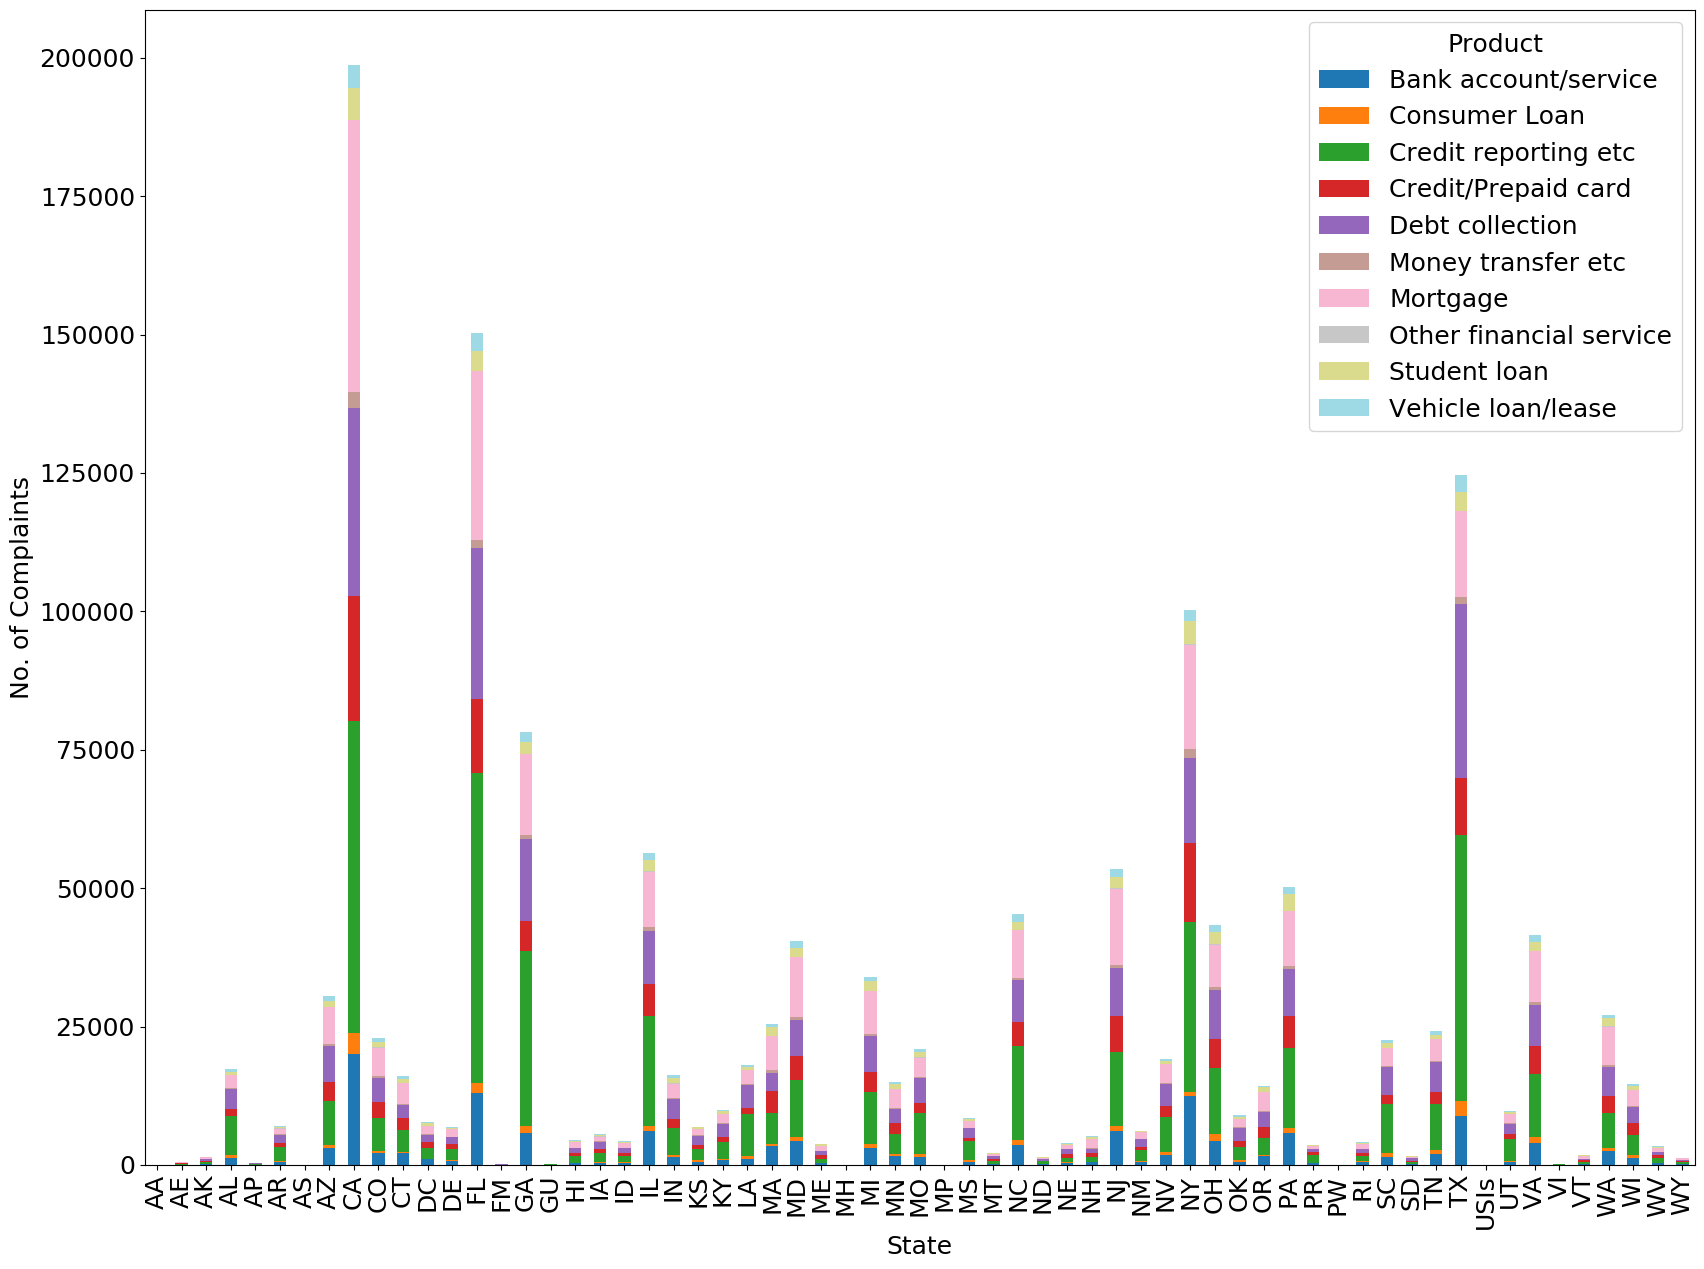

In [56]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 18})
ax1=fdata.groupby(['State','Product']).size().unstack().plot(kind='bar',stacked=True,ax = plt.gca(),colormap='tab20')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.ylabel('No. of Complaints')
plt.show()
ax1.get_figure().savefig('../Figures/StateWide_AllDistribution_countplot_1.png', bbox_inches="tight")
plt.clf()

<Figure size 640x480 with 0 Axes>

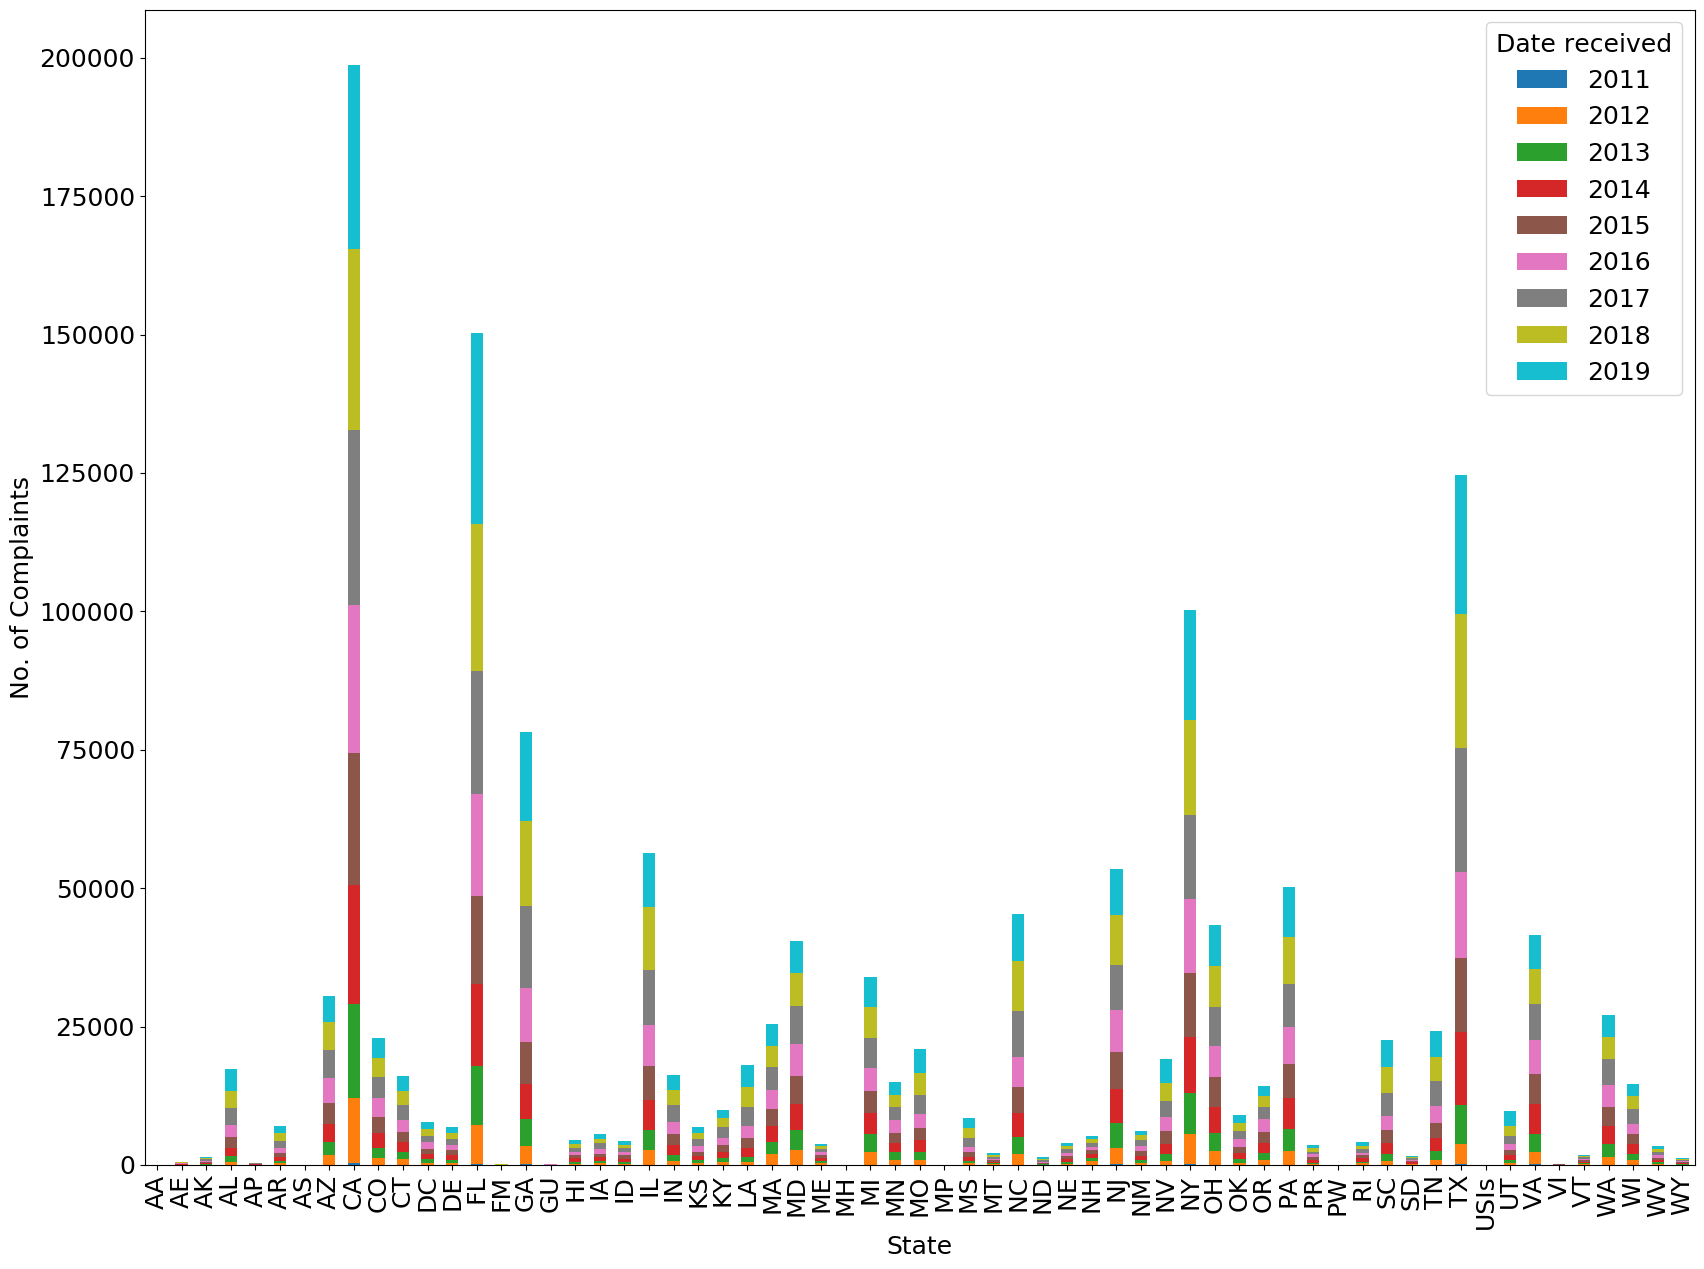

In [50]:
plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 18})
ax1=fdata.groupby(['State', fdata['Date received'].map(lambda x: x.year)]).size().unstack().plot(kind='bar',stacked=True,ax = plt.gca(),colormap='tab10')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.ylabel('No. of Complaints')
plt.show()
ax1.get_figure().savefig('../Figures/StateWide_YrDistribution_countplot_1.png', bbox_inches="tight")
plt.clf()

<Figure size 640x480 with 0 Axes>

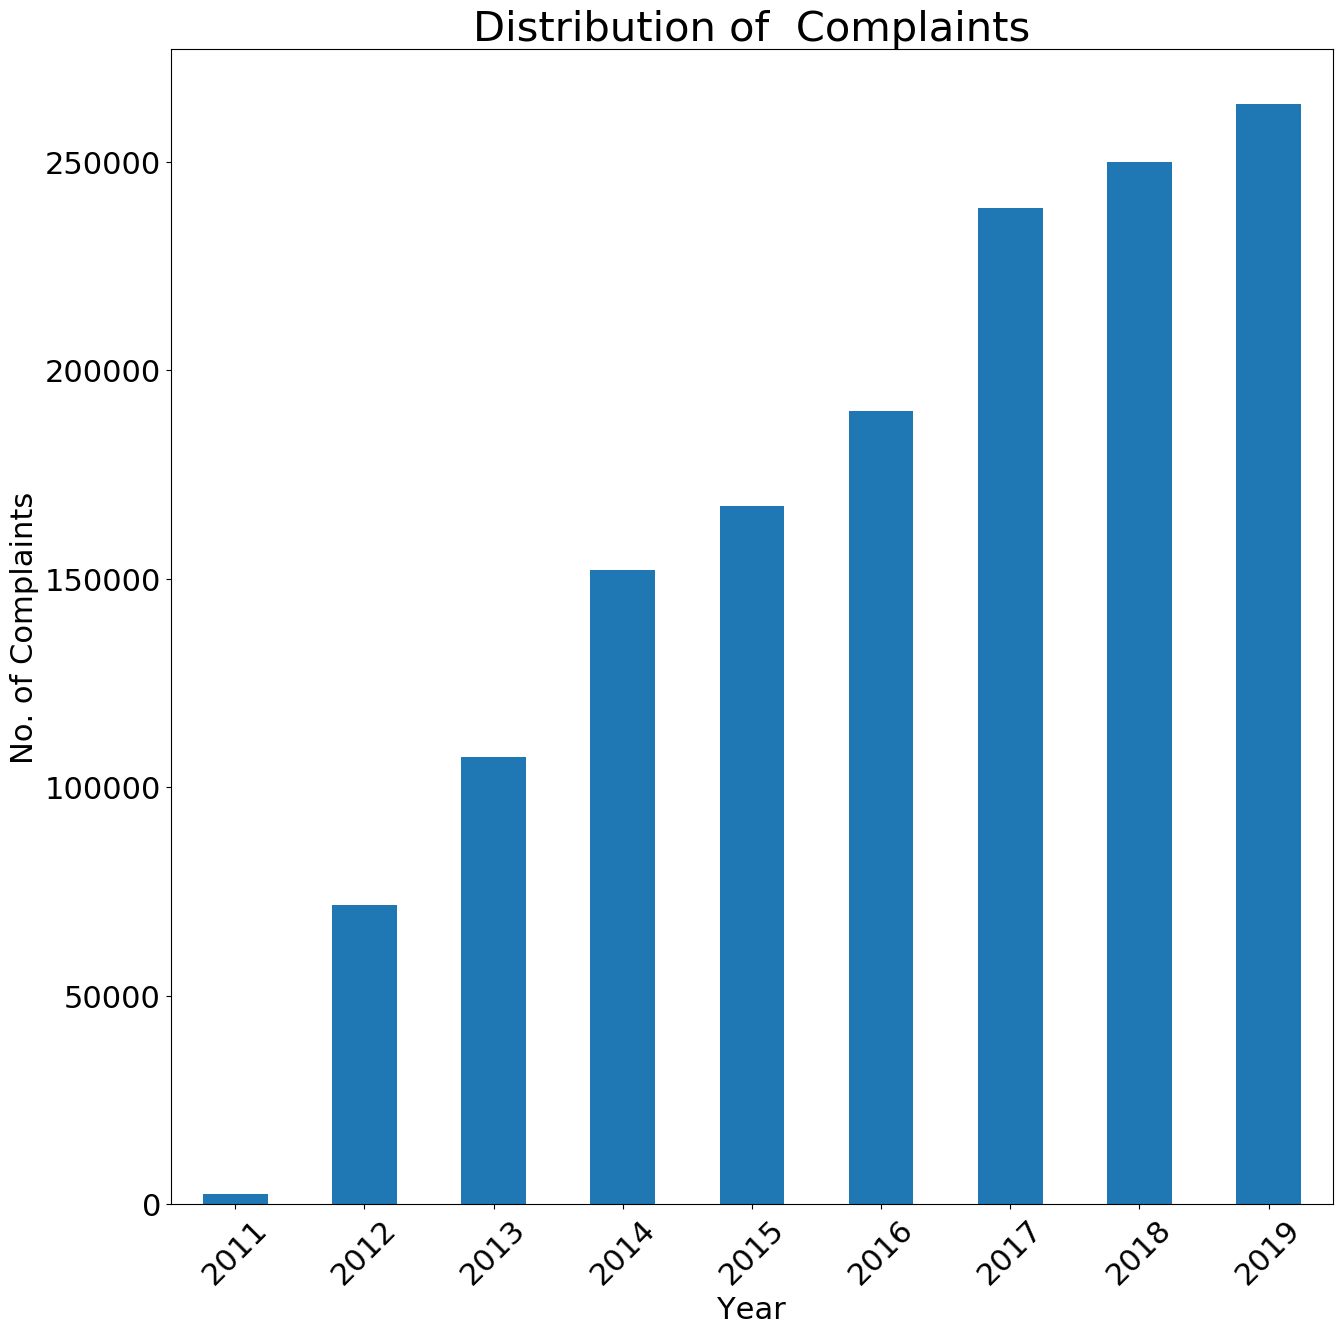

In [51]:
plt.clf()
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size': 22})
figure=fdata['Date received'].groupby(fdata['Date received'].map(lambda x: x.year)).count().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('No. of Complaints')
plt.title('Distribution of  Complaints', fontsize = 30)
figure.set_xticklabels(figure.get_xticklabels(),rotation=45)
plt.show()
figure.get_figure().savefig('../Figures/Yearwise_Distribution_countplot_1.png', bbox_inches="tight")
plt.clf()

<Figure size 640x480 with 0 Axes>

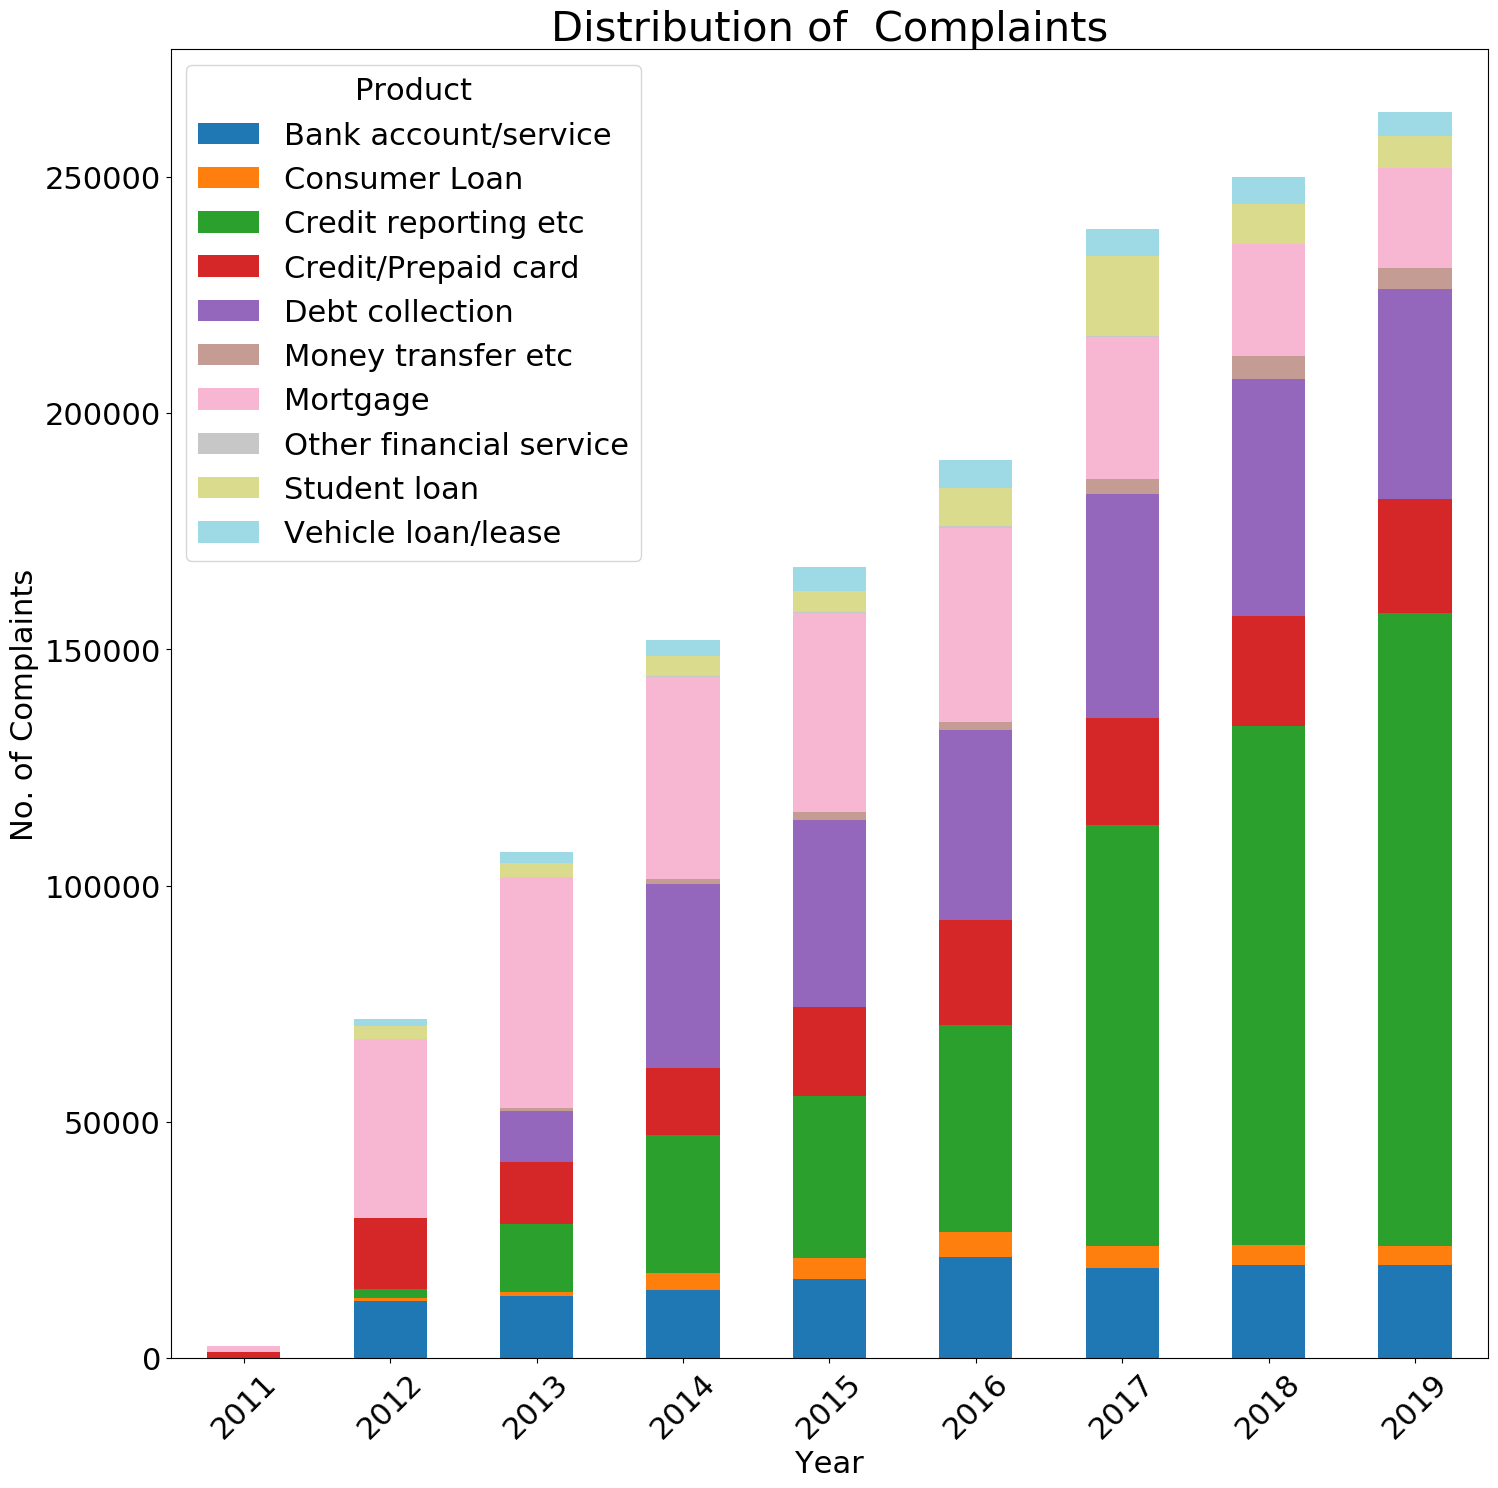

In [74]:
plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize=(17,17))
plt.rcParams.update({'font.size': 22})
figure=fdata[['Date received','Product']].groupby([fdata['Date received'].map(lambda x: x.year),'Product']).size().unstack().plot(kind='bar',stacked=True,ax = plt.gca(),colormap='tab20')
plt.xlabel('Year')
plt.ylabel('No. of Complaints')
plt.title('Distribution of  Complaints', fontsize = 30)
figure.set_xticklabels(figure.get_xticklabels(),rotation=45)
plt.show()
figure.get_figure().savefig('../Figures/Yearwise_Distribution_countplot_2.png', bbox_inches="tight")
plt.clf()

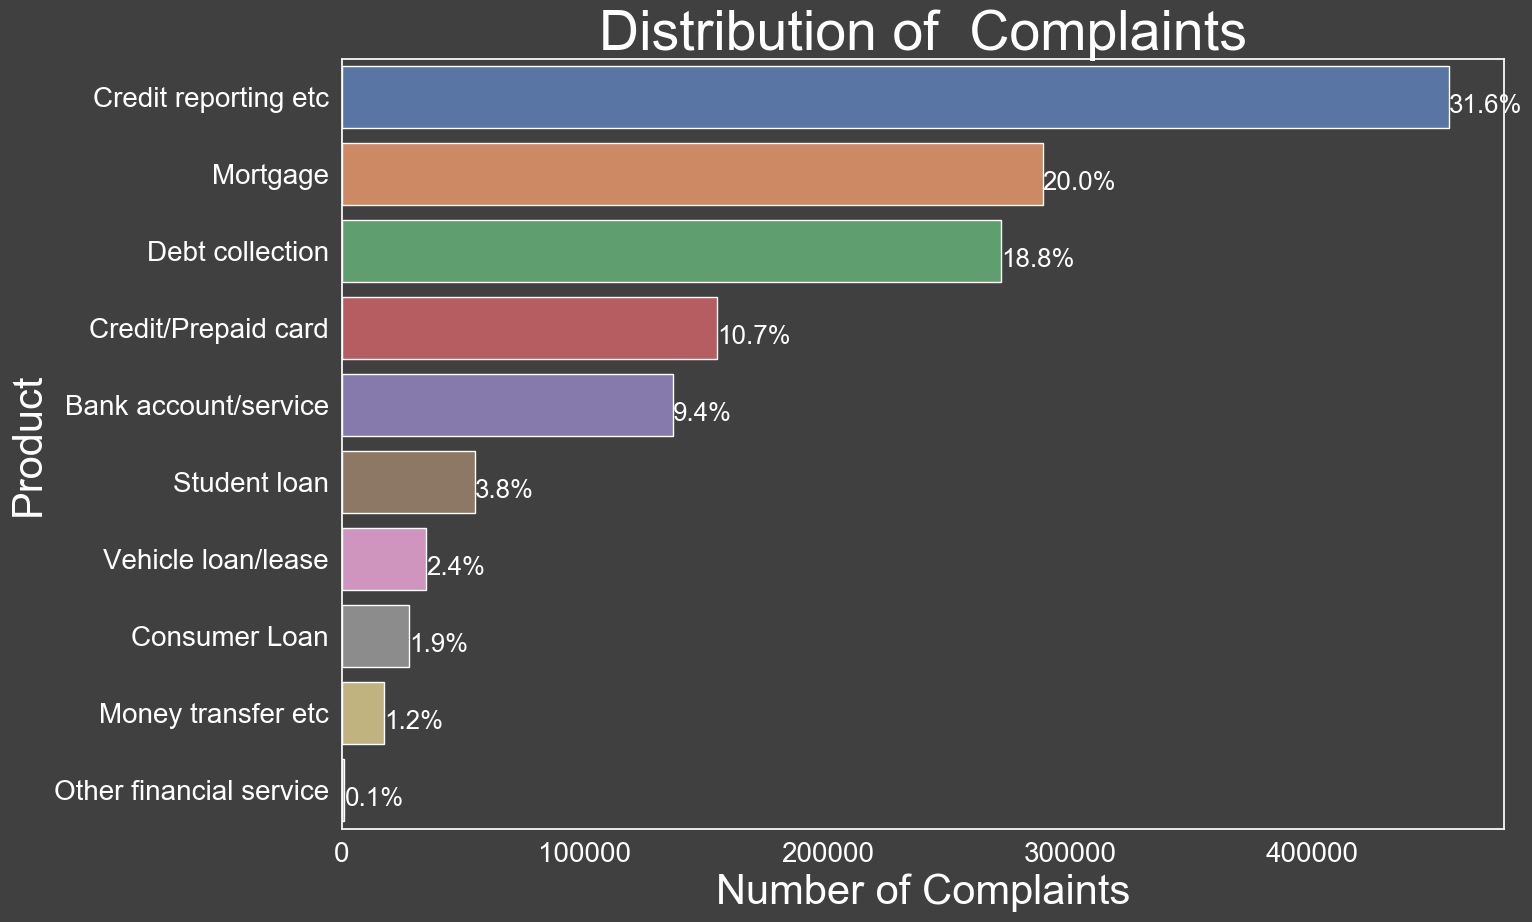

In [96]:
plt.clf()
bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(15.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20}, font_scale=1.55)

#ax2=sns.countplot(y='Product',hue = 'Date received',data=fdata,order = fdata['Product'].value_counts().index)
#ax2=sns.countplot(y='Product',hue = 'Timely response?',data=fdata,order = fdata['State'].value_counts().index)

ax2=sns.countplot(y='Product',data=fdata,order = fdata['Product'].value_counts().index)
plt.title('Distribution of  Complaints', fontsize = 40)
plt.xlabel('Number of Complaints')

total = len(fdata['Product'])
for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.1
        y = p.get_y() + p.get_height()/2+0.2
        ax2.annotate(percentage, (x, y))
plt.show()

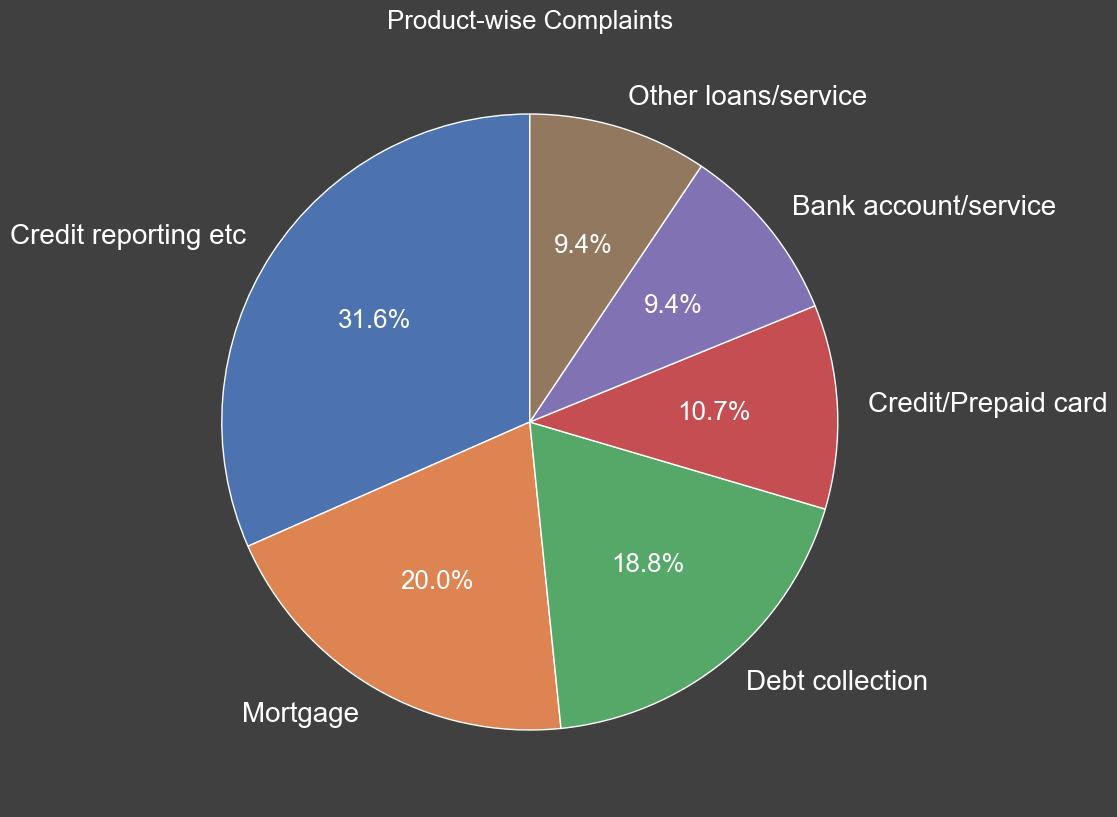

In [97]:
noc=fdata['Product'].value_counts().tolist()
prod=fdata['Product'].value_counts().index.tolist()
for i in noc[6:]:
    noc[5]=noc[5]+i
del noc[-4:]
del prod[-4:]
prod[5]='Other loans/service'
plt.pie(noc, labels=prod, startangle=90, autopct='%.1f%%')
plt.title('Product-wise Complaints')
plt.show()

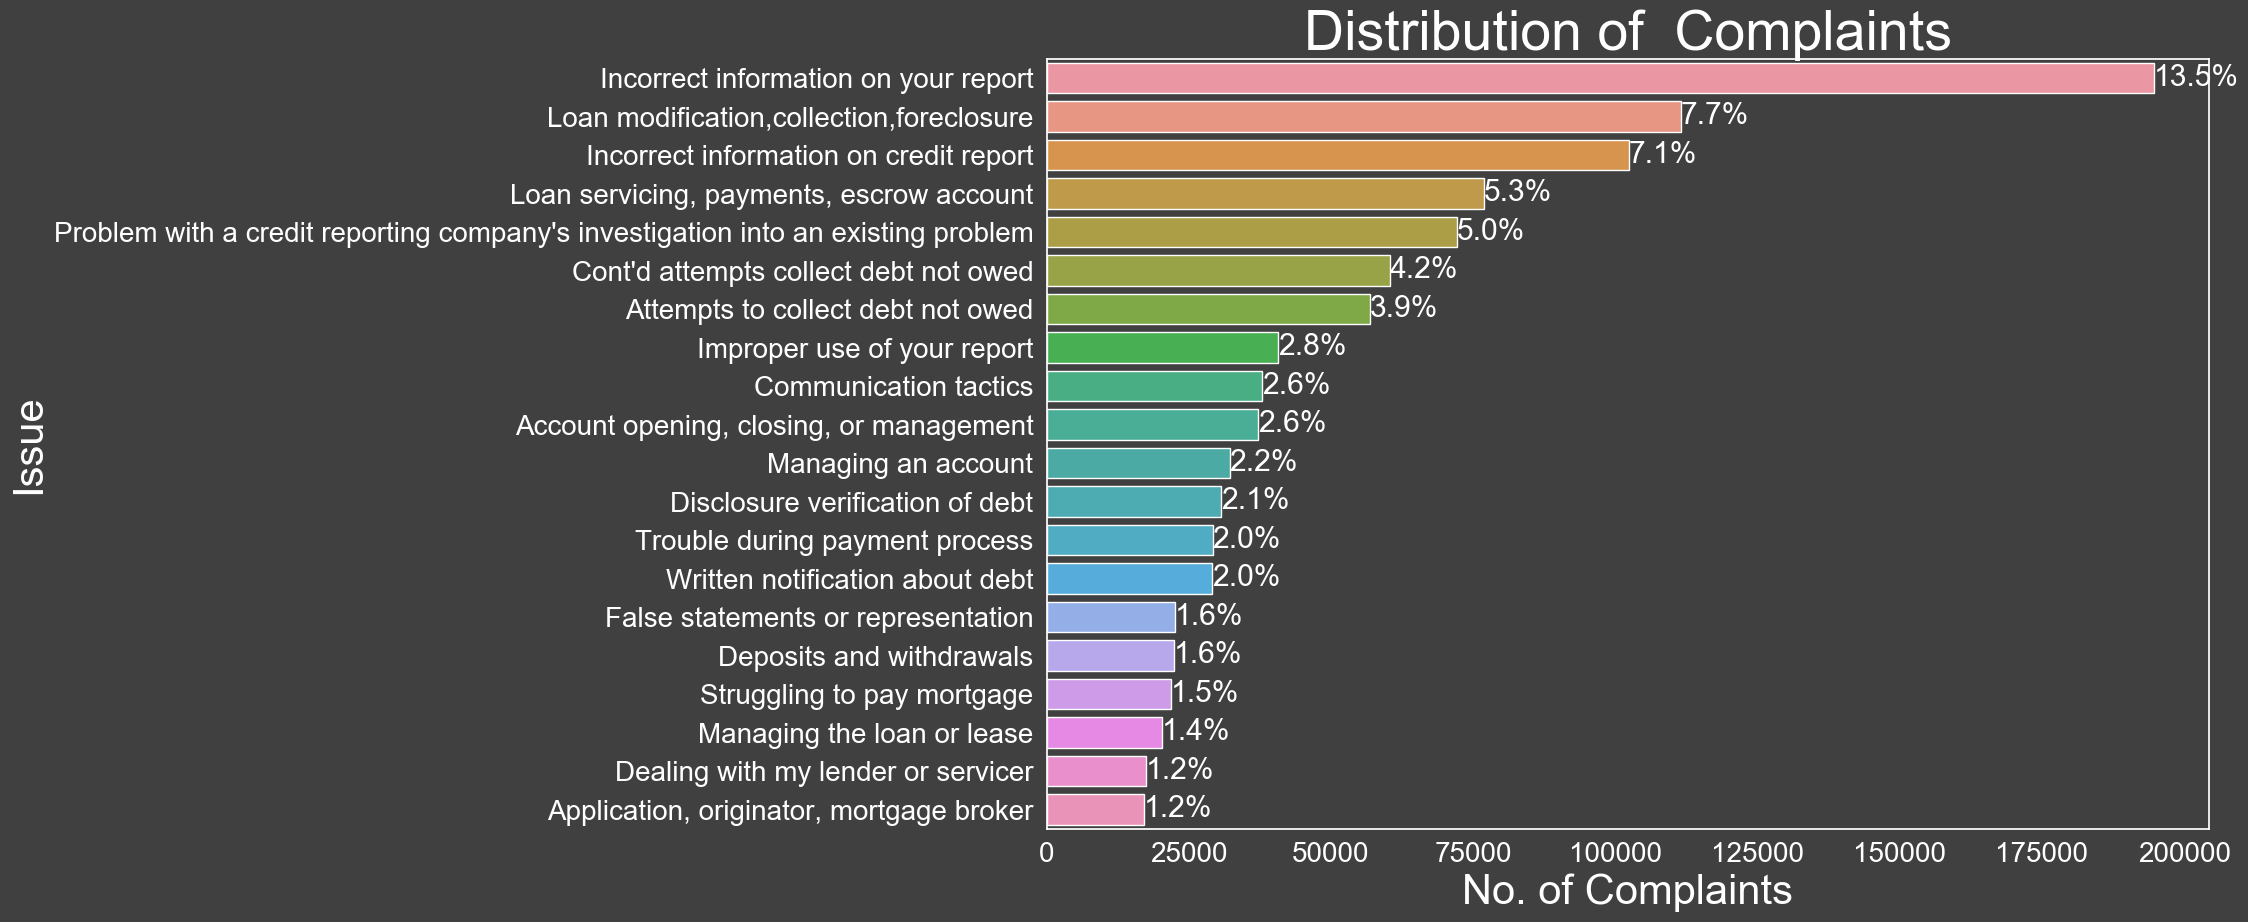

In [71]:
plt.clf()
bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(15.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20}, font_scale=1.8)

ax2=sns.countplot(y='Issue',data=fdata,order = fdata['Issue'].value_counts().index[:20])
plt.title('Distribution of  Complaints', fontsize = 40)
#plt.ylabel('Top 10 issues')
plt.xlabel('No. of Complaints')


total = len(fdata['Issue'])
for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.1
        y = p.get_y() + p.get_height()/2+0.2
        ax2.annotate(percentage, (x, y))
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 1700x1700 with 0 Axes>

<Figure size 1700x1700 with 0 Axes>

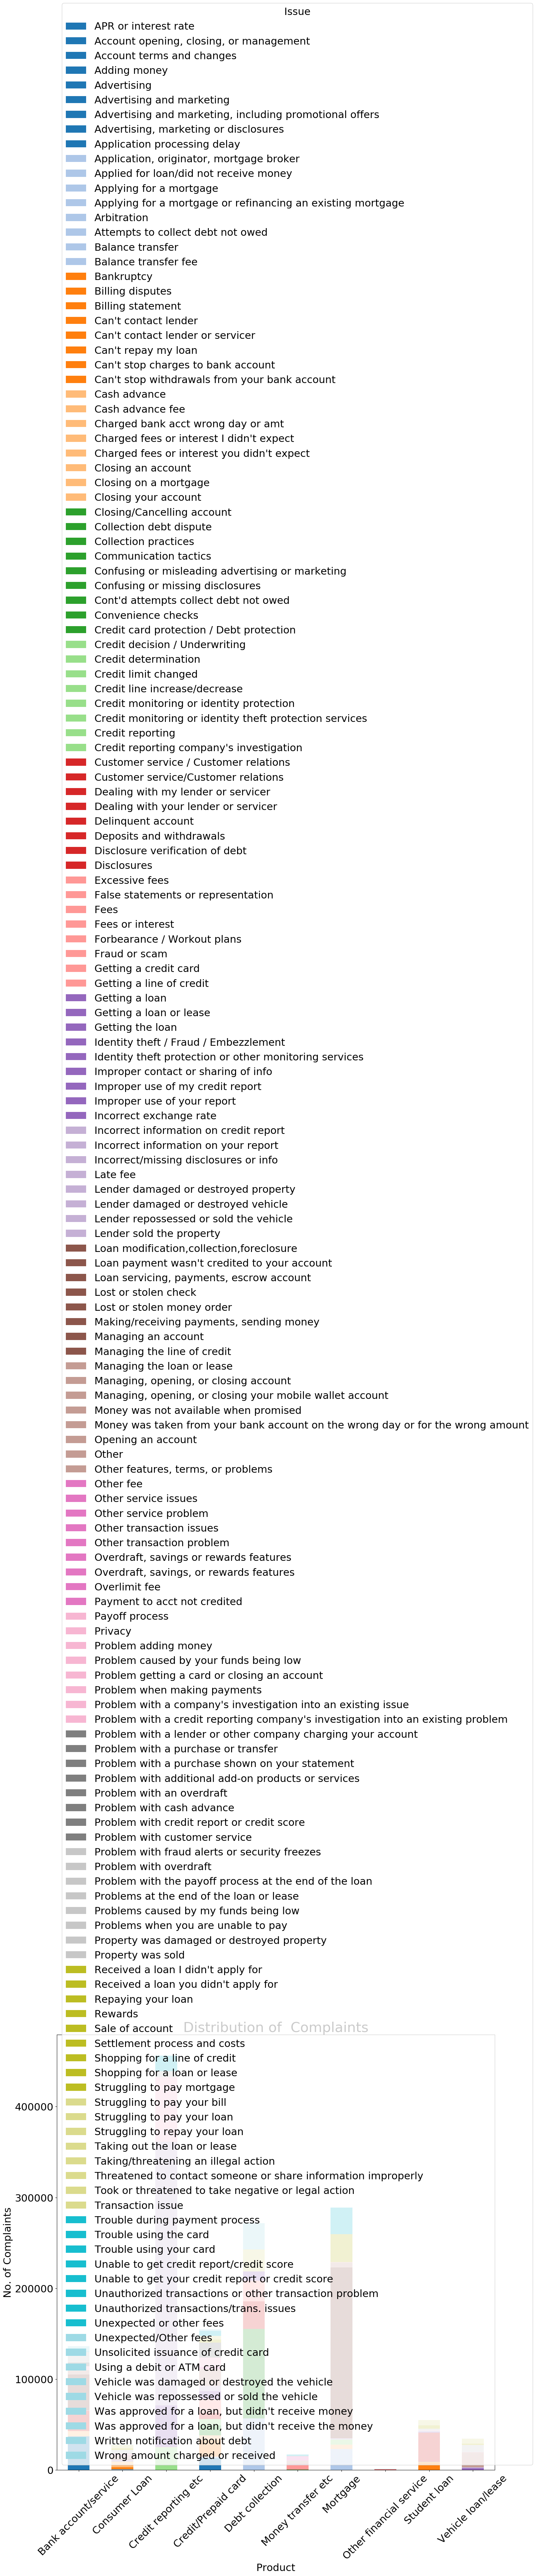

In [79]:
plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize=(17,17))
plt.rcParams.update({'font.size': 22})
figure=fdata[['Product','Issue']].groupby(['Product','Issue']).size().unstack().plot(kind='bar',stacked=True,ax = plt.gca(),colormap='tab20')
#ns.stripplot('Product','Issue', data=fdata)
plt.xlabel('Product')
plt.ylabel('No. of Complaints')
plt.title('Distribution of  Complaints', fontsize = 30)
figure.set_xticklabels(figure.get_xticklabels(),rotation=45)
plt.show()
#figure.get_figure().savefig('../Figures/Productwise_Distribution_countplot_1.png', bbox_inches="tight")
plt.clf()

In [97]:
set(data['Sub-issue'][data.Issue=='Dealing with your lender or servicer'].unique().tolist())|set(data['Sub-issue'][data.Issue=='Dealing with my lender or servicer'].unique().tolist())

{"Don't agree with fees charged",
 "Don't agree with the fees charged",
 'Having problems with customer service',
 'Keep getting calls about my loan',
 'Keep getting calls about your loan',
 'Need information about my balance/terms',
 'Need information about your loan balance or loan terms',
 'Problem with customer service',
 'Received bad information about my loan',
 'Received bad information about your loan',
 'Trouble with how payments are being handled',
 'Trouble with how payments are handled'}

In [108]:
set(str.split('Don\'t agree with fees charged'))&set(str.split('Don\'t agree with the fees charged'))

{"Don't", 'agree', 'charged', 'fees', 'with'}

In [123]:
abs(len(str.split('Don\'t agree with fees charged'))-len(str.split('Don\'t agree with the fees charged')))>1

False

In [140]:
subj='Don\'t agree with the fees charged'
aubi= "Can't qualify for a loan"
(subj==np.nan or subj==np.nan)

False

In [154]:
data['Issue'].unique().tolist()

['Incorrect information on credit report',
 'Dealing with your lender or servicer',
 "Problem with a credit reporting company's investigation into an existing problem",
 'Loan servicing, payments, escrow account',
 'Billing disputes',
 'Loan modification,collection,foreclosure',
 'Incorrect information on your report',
 'Attempts to collect debt not owed',
 'Improper use of your report',
 'Account opening, closing, or management',
 'Problem with a purchase shown on your statement',
 'Identity theft / Fraud / Embezzlement',
 'False statements or representation',
 'Problems when you are unable to pay',
 'Deposits and withdrawals',
 "Cont'd attempts collect debt not owed",
 'Trouble during payment process',
 'Unexpected or other fees',
 'Problem with a lender or other company charging your account',
 'Written notification about debt',
 'Problem when making payments',
 'Credit card protection / Debt protection',
 'Credit monitoring or identity protection',
 'Disclosure verification of debt

In [307]:
comon_is=dict()
for subi in data['Issue'].unique().tolist():
    for subj in data['Issue'].unique().tolist():
        if subi!=subj and subj!=np.nan and subi!=np.nan:
            if len(set(str.split(subi)))>1 and len(set(str.split(subi)))>1:
                if abs(len(set(str.split(subi))&set(str.split(subj))))>=len(str.split(subi))-1 and abs(len(set(str.split(subi))&set(str.split(subj))))>=len(str.split(subj))-1:  
                    if (subj not in comon_is.keys()) or (subj in comon_is.values()):
                        comon_is[subi]=subj
    

In [310]:
comon_is

{'Incorrect information on credit report': 'Incorrect information on your report',
 'Dealing with your lender or servicer': 'Dealing with my lender or servicer',
 'Billing disputes': 'Billing statement',
 'Closing your account': 'Closing an account',
 'Struggling to pay your loan': 'Struggling to pay your bill',
 'Managing an account': 'Opening an account',
 'Closing/Cancelling account': 'Delinquent account',
 'Other fee': 'Overlimit fee',
 "Charged fees or interest you didn't expect": "Charged fees or interest I didn't expect",
 'Late fee': 'Overlimit fee',
 'Closing an account': 'Opening an account',
 'Other service problem': 'Other service issues',
 'Balance transfer fee': 'Balance transfer',
 'Opening an account': 'Closing an account',
 'Credit determination': 'Credit reporting',
 'Other transaction problem': 'Other transaction issues',
 'Other transaction issues': 'Other service issues',
 'Trouble using the card': 'Trouble using your card',
 "Received a loan I didn't apply for": "

In [311]:
to_del1=['Managing an account','Late fee','Closing/Cancelling account','Struggling to pay your loan','Other fee','Credit determination','Billing disputes','Balance transfer fee','Other transaction issues']
for i in to_del1:
    del comon_is[i]

In [312]:
comon_is

{'Incorrect information on credit report': 'Incorrect information on your report',
 'Dealing with your lender or servicer': 'Dealing with my lender or servicer',
 'Closing your account': 'Closing an account',
 "Charged fees or interest you didn't expect": "Charged fees or interest I didn't expect",
 'Closing an account': 'Opening an account',
 'Other service problem': 'Other service issues',
 'Opening an account': 'Closing an account',
 'Other transaction problem': 'Other transaction issues',
 'Trouble using the card': 'Trouble using your card',
 "Received a loan I didn't apply for": "Received a loan you didn't apply for",
 'Other service issues': 'Other transaction issues',
 'Cash advance': 'Cash advance fee',
 'Getting a loan': 'Getting the loan',
 "Was approved for a loan, but didn't receive the money": "Was approved for a loan, but didn't receive money",
 'Excessive fees': 'Unexpected/Other fees',
 'Problem with overdraft': 'Problem with an overdraft',
 'Overdraft, savings or rewar

In [313]:
fdata.Issue=fdata.Issue.replace(comon_is,regex=True)

In [289]:
set(data['Sub-issue'][data.Issue=='Other service issues'].unique().tolist()) or set(data['Sub-issue'][data.Issue=='Other transaction issues'].unique().tolist())

{nan}

In [274]:
set(data['Sub-issue'][data.Issue=='Lender damaged or destroyed property'].unique().tolist())

{nan}

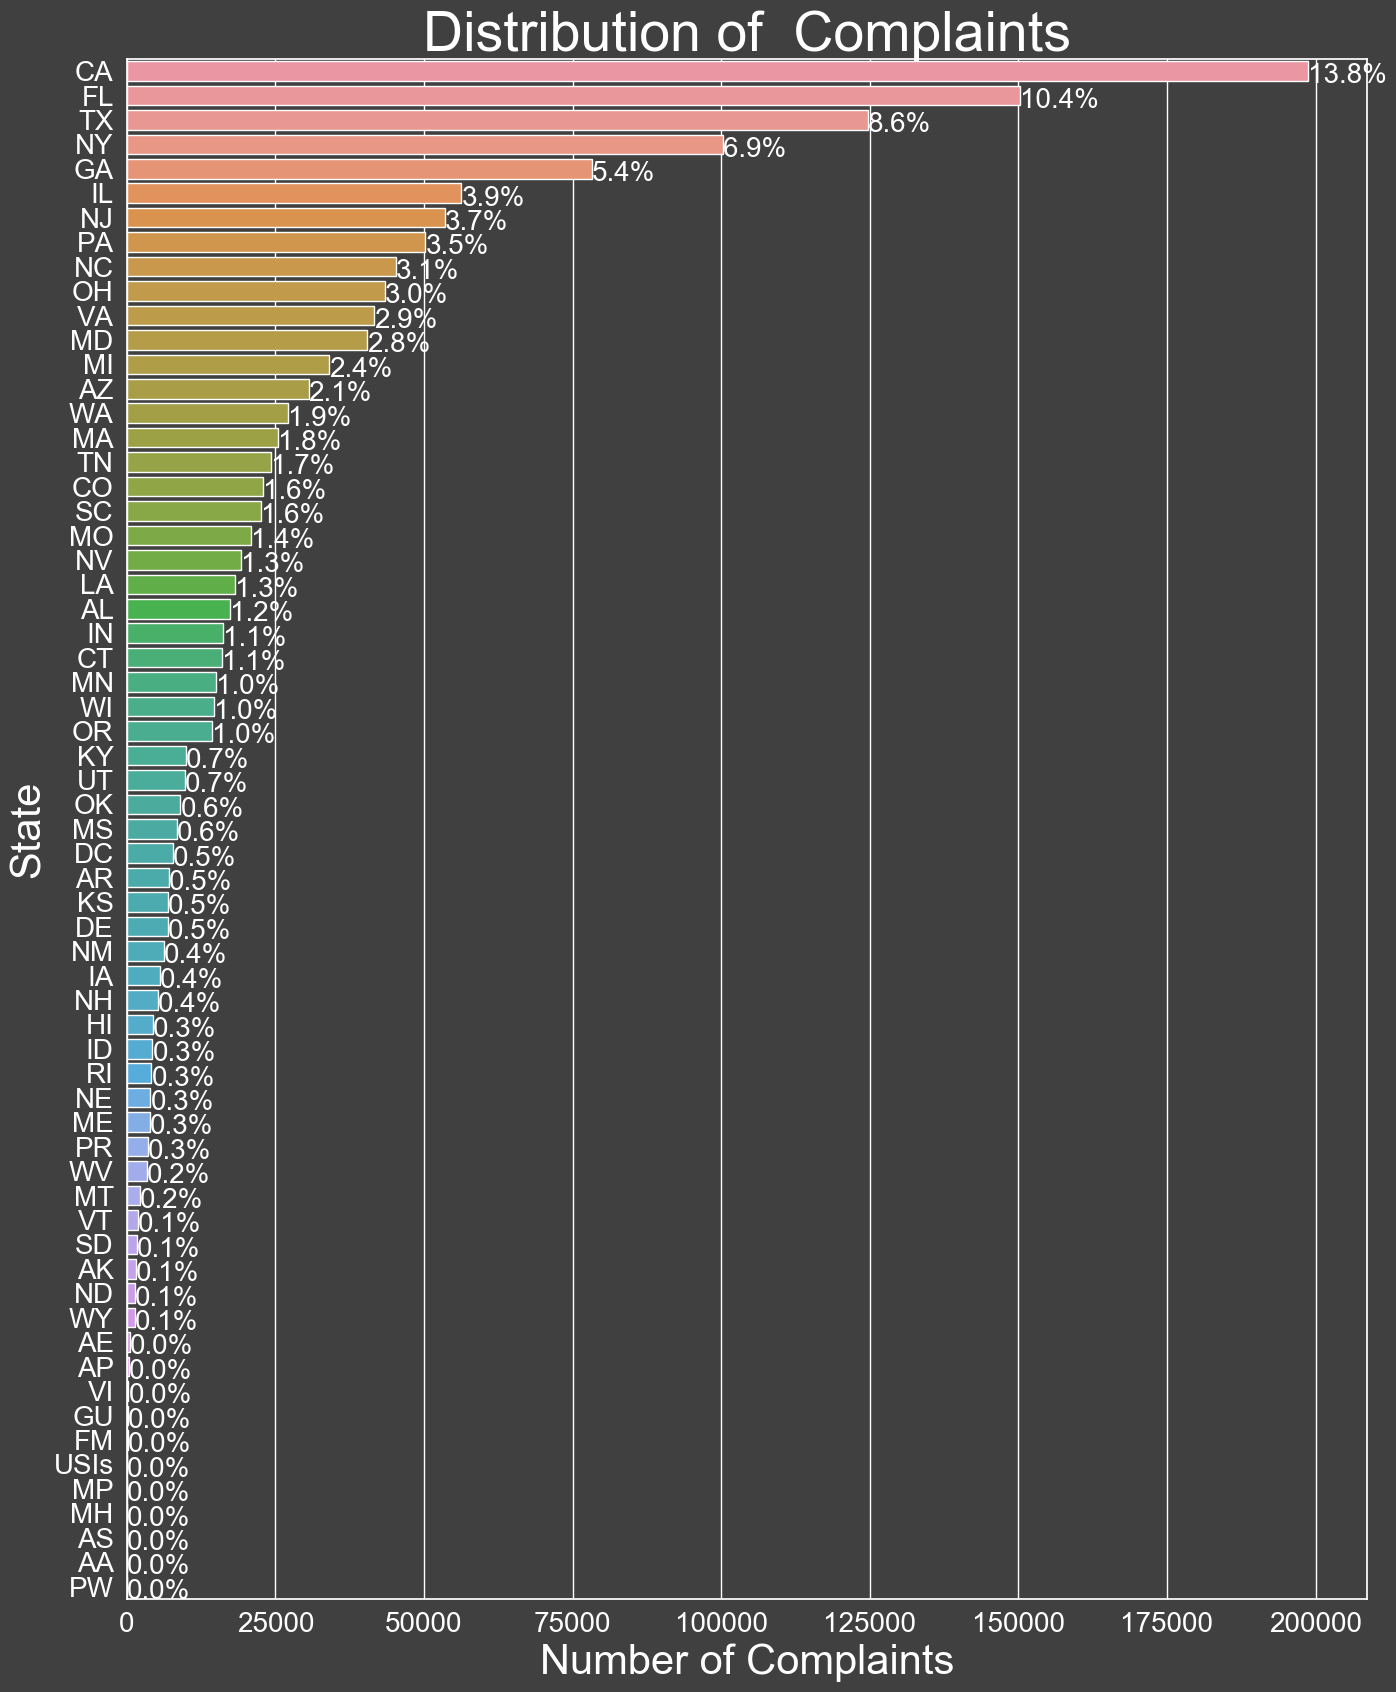

In [92]:
plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)
bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            'font.size': 20,
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(16.0, 20.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20}, font_scale=1.25)

#ax2=sns.countplot(y='State',hue = 'Timely response?',data=fdata,order = fdata['State'].value_counts().index)
#ax3=sns.countplot(y='State',hue = 'Product',data=fdata,order = fdata['State'].value_counts().index)
ax2=sns.countplot(y='State',data=fdata,order = fdata['State'].value_counts().index)
plt.title('Distribution of  Complaints', fontsize = 40)
plt.xlabel('Number of Complaints')

total = len(fdata['State'])
for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.05
        y = p.get_y() + p.get_height()/2+0.5
        ax2.annotate(percentage, (x, y))

plt.show()
#ax2.legend(loc='best')
#ax2.set_yticklabels(ax.get_yticklabels(),rotation=40)
#ax2.get_figure().savefig('../Figures/StateWide_Distribution_countplot_1.png')

# Feature building

In [124]:
fdata['SentToCompanyIn']=((fdata['Date sent to company']-fdata['Date received']).astype('timedelta64[D]'))

C:\Users\lmw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
fdata.head()

,Date received,Product,Sub-product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,SentToCompanyIn
Complaint ID,,,,,,,,,,
1509954,2015-08-09,Credit reporting etc,Credit reporting,Incorrect information on credit report,Experian Information Solutions Inc.,NJ,Web,Closed with non-monetary relief,True,0.0
3475943,2019-12-23,Student loan,Federal student loan servicing,Dealing with your lender or servicer,AES/PHEAA,MA,Web,Closed with explanation,True,0.0
3136759,2019-01-29,Credit reporting etc,Credit reporting,Problem with a credit reporting company's inve...,"EQUIFAX, INC.",NY,Web,Closed with non-monetary relief,True,1.0
1527601,2015-08-19,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",WELLS FARGO & COMPANY,CA,Web,Closed with explanation,True,0.0
1816726,2016-03-04,Credit/Prepaid card,General-purpose credit card or charge card,Billing disputes,DISCOVER BANK,NV,Web,Closed with explanation,True,0.0


In [126]:
del fdata['Date sent to company']

In [ ]:
mapping = {'Yes': True, 'No': False}
fdata=fdata.replace({'Timely response?': mapping})
fdata['Timely response?'] = fdata['Timely response?'].astype(bool)

In [147]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443553 entries, 1509954 to 3437084
Data columns (total 10 columns):
Date received                   1443553 non-null datetime64[ns]
Product                         1443553 non-null category
Sub-product                     1443553 non-null object
Issue                           1443553 non-null object
Company                         1443553 non-null object
State                           1443553 non-null object
Submitted via                   1443553 non-null category
Company response to consumer    1443553 non-null category
Timely response?                1443553 non-null bool
SentToCompanyIn                 1443553 non-null float64
dtypes: bool(1), category(3), datetime64[ns](1), float64(1), object(4)
memory usage: 82.6+ MB


In [148]:
fdata['Submitted via']=fdata['Submitted via'].astype('category')
fdata['Company response to consumer']=fdata['Company response to consumer'].astype('category')
fdata['Product']=fdata['Product'].astype('category')
#fdata = pd.get_dummies(fdata, drop_first=False)

KeyboardInterrupt: 

In [142]:
fdata_onehot = fdata.copy()
fdata_onehot['Submitted via']=fdata_onehot['Submitted via'].astype('category')
fdata_onehot['Company response to consumer']=fdata_onehot['Company response to consumer'].astype('category')
fdata_onehot = pd.get_dummies(fdata_onehot, drop_first=False)

KeyboardInterrupt: 

In [141]:
fdata_onehot.dtypes

Date received                                                   datetime64[ns]
Timely response?                                                          bool
SentToCompanyIn                                                        float64
Product_Bank account/service                                             uint8
Product_Consumer Loan                                                    uint8
Product_Credit reporting etc                                             uint8
Product_Credit/Prepaid card                                              uint8
Product_Debt collection                                                  uint8
Product_Money transfer etc                                               uint8
Product_Mortgage                                                         uint8
Product_Other financial service                                          uint8
Product_Student loan                                                     uint8
Product_Vehicle loan/lease                          

In [315]:
fdata['Issue'].unique().tolist()

['Incorrect information on your report',
 'Dealing with my lender or servicer',
 "Problem with a credit reporting company's investigation into an existing problem",
 'Loan servicing, payments, escrow account',
 'Billing disputes',
 'Loan modification,collection,foreclosure',
 'Attempts to collect debt not owed',
 'Improper use of your report',
 'Account opening, closing, or management',
 'Problem with a purchase shown on your statement',
 'Identity theft / Fraud / Embezzlement',
 'False statements or representation',
 'Problems when you are unable to pay',
 'Deposits and withdrawals',
 "Cont'd attempts collect debt not owed",
 'Trouble during payment process',
 'Unexpected or other fees',
 'Problem with a lender or other company charging your account',
 'Written notification about debt',
 'Problem when making payments',
 'Credit card protection / Debt protection',
 'Credit monitoring or identity protection',
 'Disclosure verification of debt',
 'Communication tactics',
 'Other',
 'APR 

# Modeling

In [78]:
77/60

1.2833333333333334